In [67]:
from pathlib import Path
root_dir = Path("/mnt/infonas/data/nlokesh/image_recourse")
import sys
sys.path.insert(0, str(root_dir))
sys.path.insert(0, str(root_dir / "our_method"))
import numpy as np
import pandas as pd

In [16]:
import pickle as pkl
rsij_dir = root_dir / "our_method/results/models/greedy_rec"
prefix = '<bound method ShapenetRecourseHelper._def_name of <our_method.recourse.ShapenetRecourseHelper object at 0x7fe01e3862e8>>riter'

In [17]:
import our_method.constants as constants
import utils.common_utils as cu
import utils.our_main_helper as main_helper

dh = main_helper.get_data_helper(dataset_name = constants.SHAPENET)

In [54]:
ideal_betas = dh._train._ideal_betas
Beta = dh._train._Beta
Siblings = dh._train._Siblings

In [101]:
good_r_counts = []
total_r = []
r_beta_freq = {
    "beta": [],
    "cnt": []
}

Total_runs = 19
for r_iter in (np.arange(1, Total_runs)*20)-1:
    with open(rsij_dir / f"{prefix}-{r_iter}-R-Sij.pkl", "rb") as file:
        rsij = pkl.load(file)
        
    R = rsij["R"]
    Sij = rsij["Sij"]
    
    total_r.append(len(R))
    good_r_counts.append(np.sum(ideal_betas[np.array(R)]))
    unq, cnt = np.unique(Beta[R], axis=0, return_counts=True)
    
    r_beta_freq["beta"].append(unq)
    r_beta_freq["cnt"].append(cnt)    

In [102]:
pd.DataFrame({"ideal": good_r_counts, "total": total_r})

,ideal,total
0,0,20
1,3,40
2,5,60
3,8,80
4,10,100
5,16,120
6,21,140
7,25,160
8,31,180
9,35,200


In [103]:
for idx in range(Total_runs-1):
    beta, cnts = r_beta_freq["beta"][idx], r_beta_freq["cnt"][idx]

In [104]:
beta

array([[0, 0, 3],
       [0, 1, 0],
       [1, 0, 1],
       [2, 0, 2],
       [2, 1, 0],
       [3, 1, 0],
       [3, 2, 1],
       [4, 2, 2],
       [5, 2, 3]])

In [105]:
beta = [str(row) for row in beta]

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams.update({'figure.figsize':(20,30), 'figure.dpi':100})

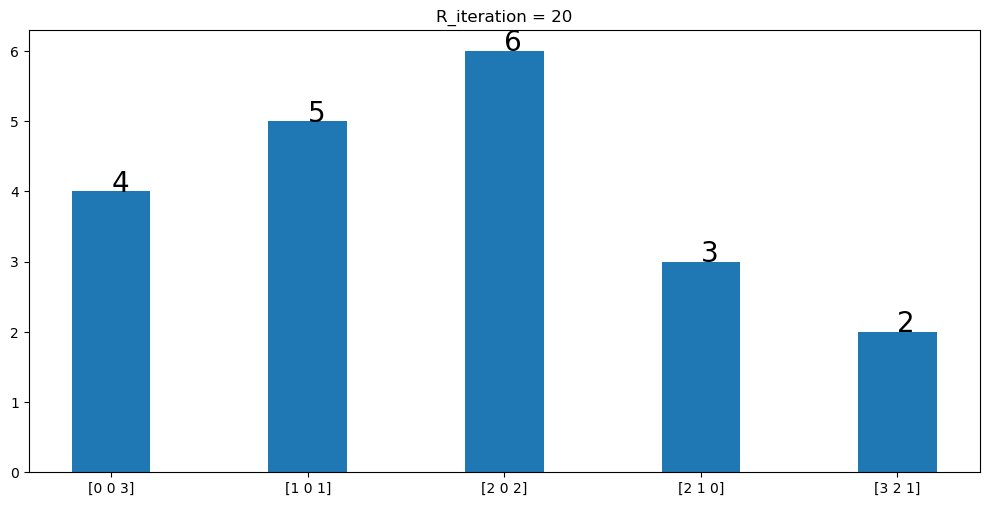

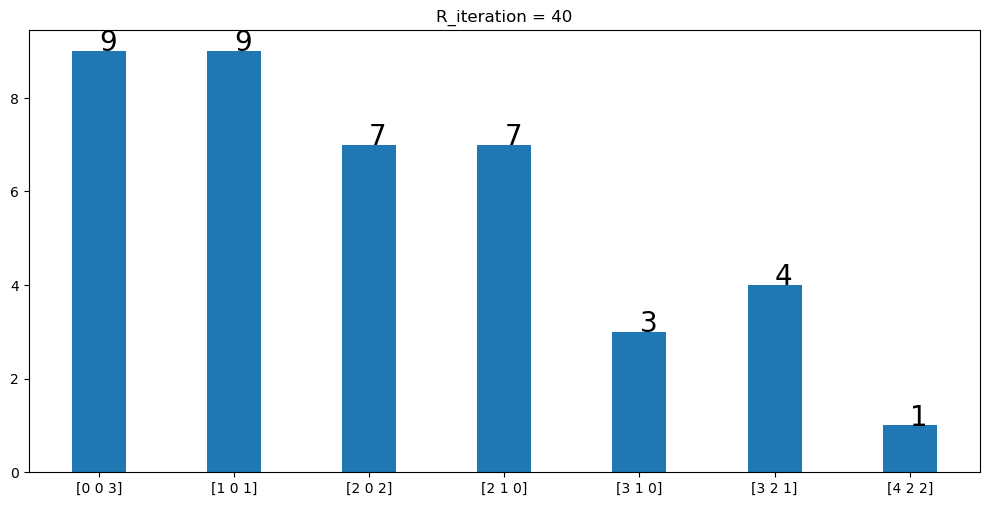

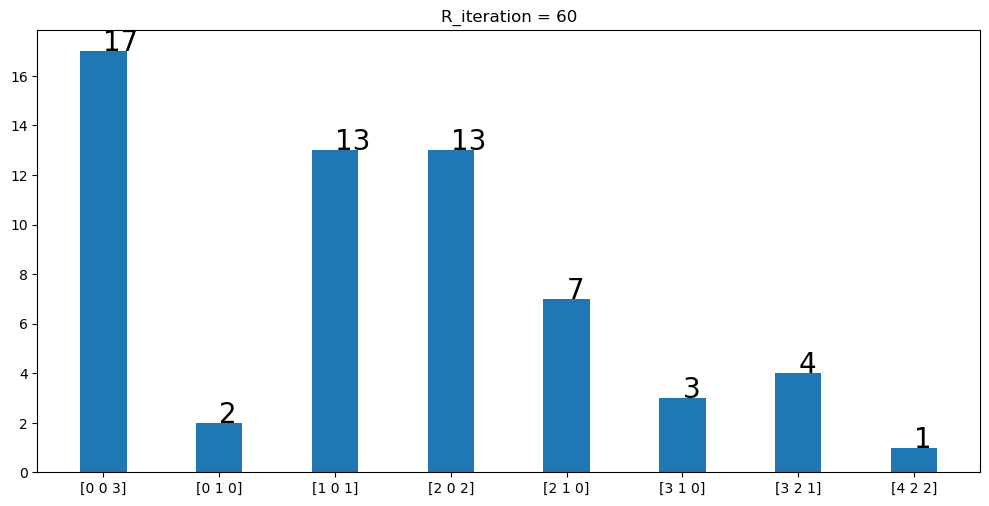

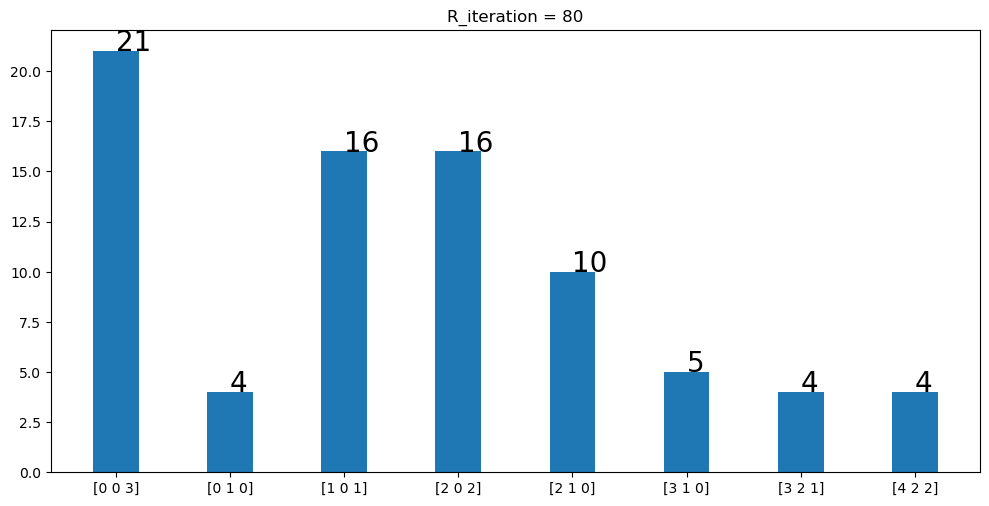

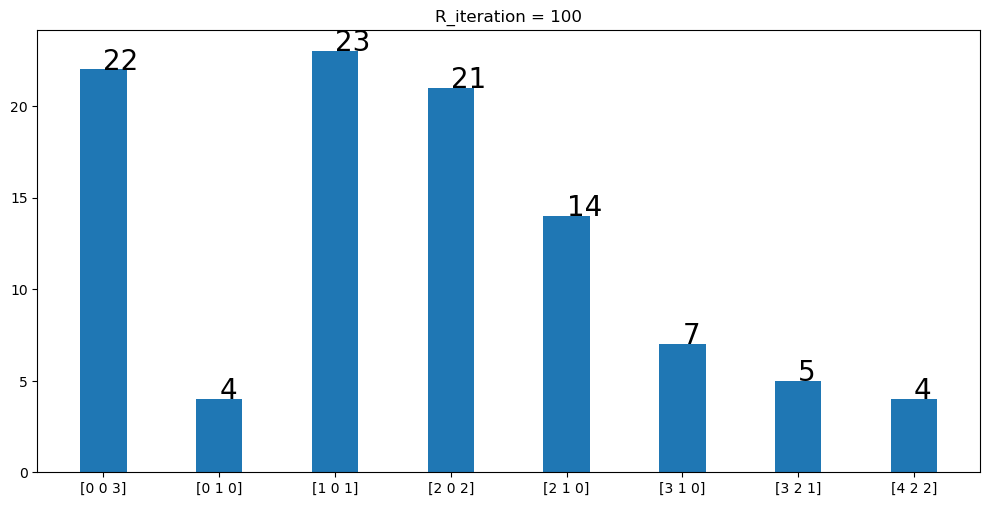

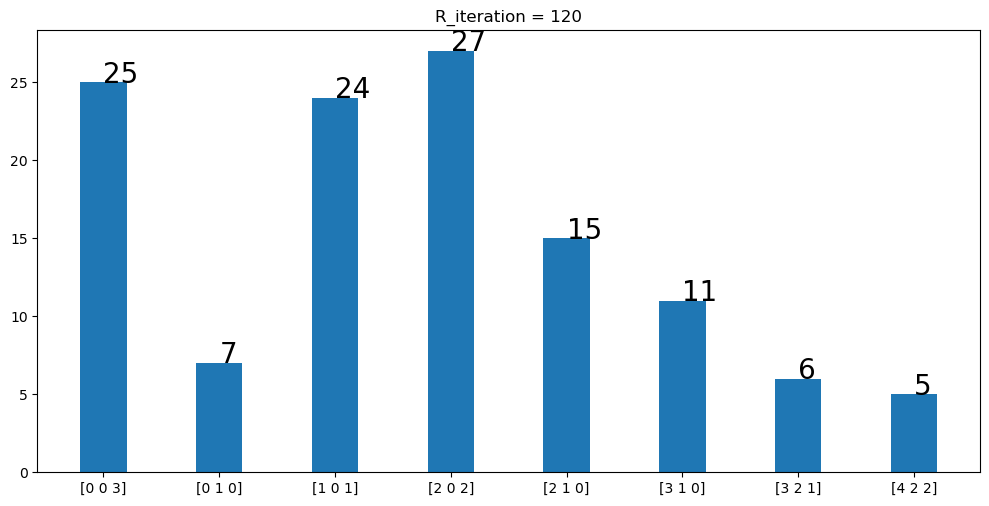

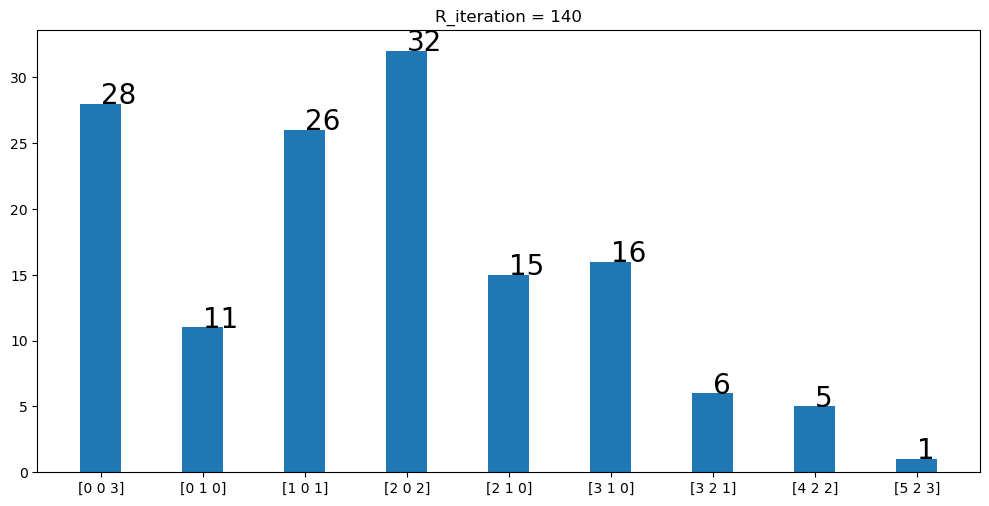

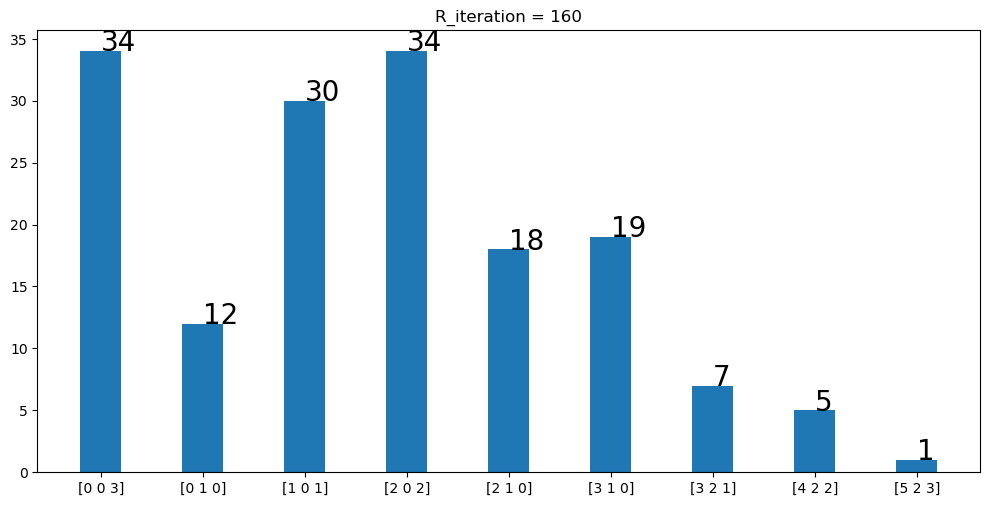

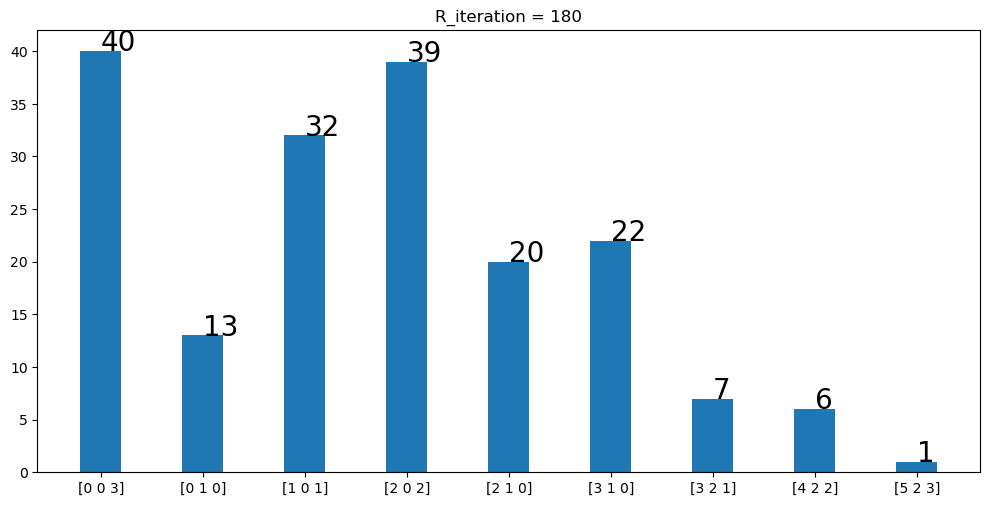

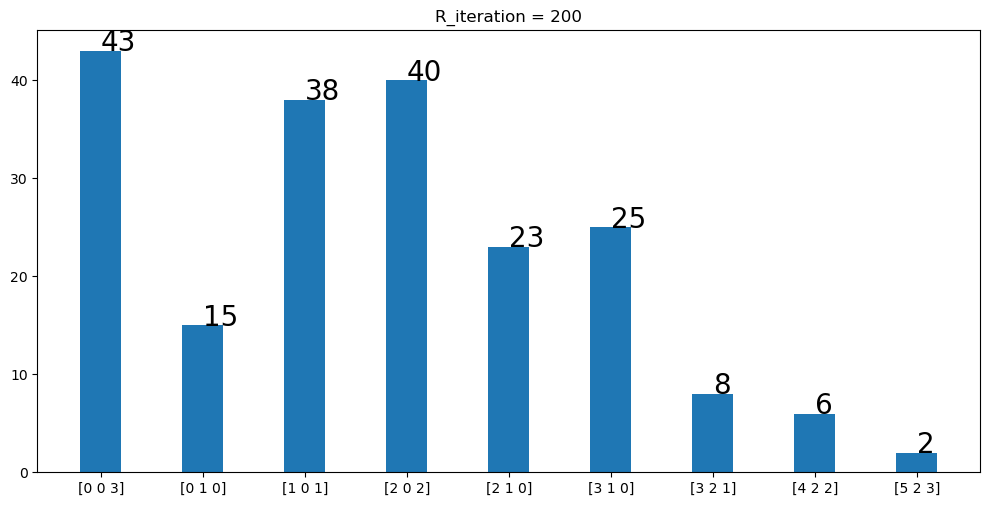

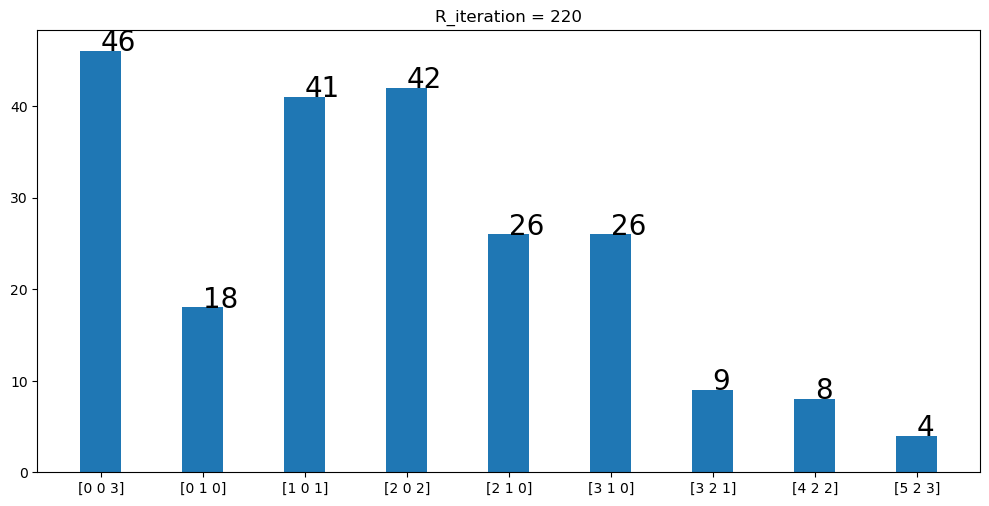

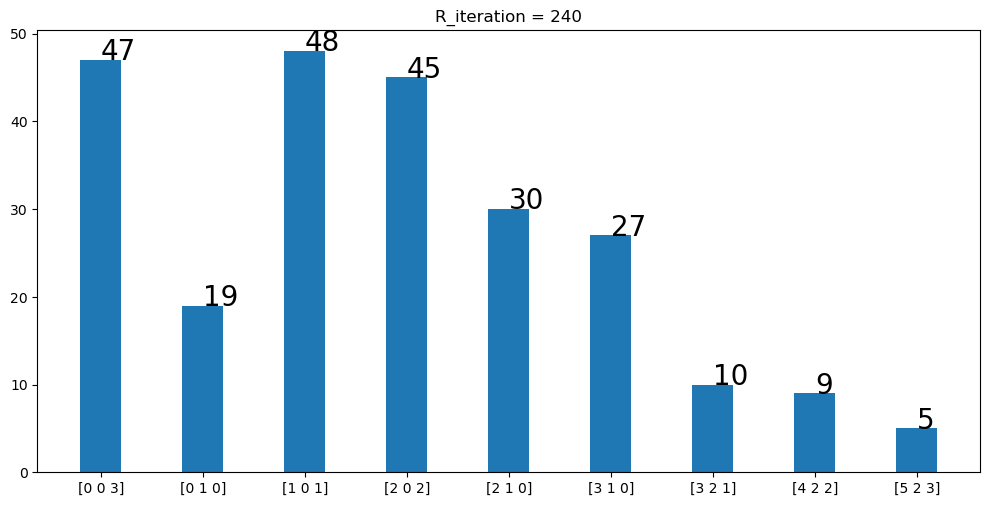

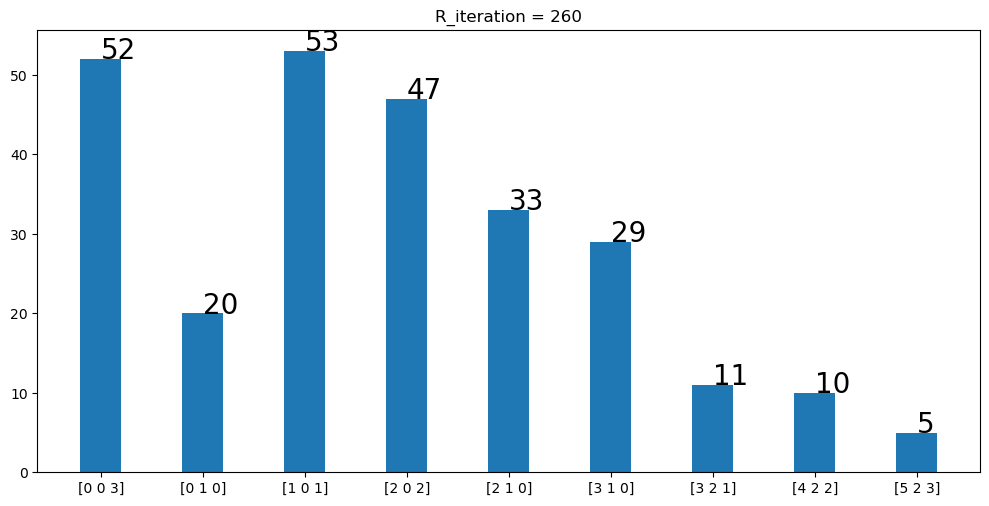

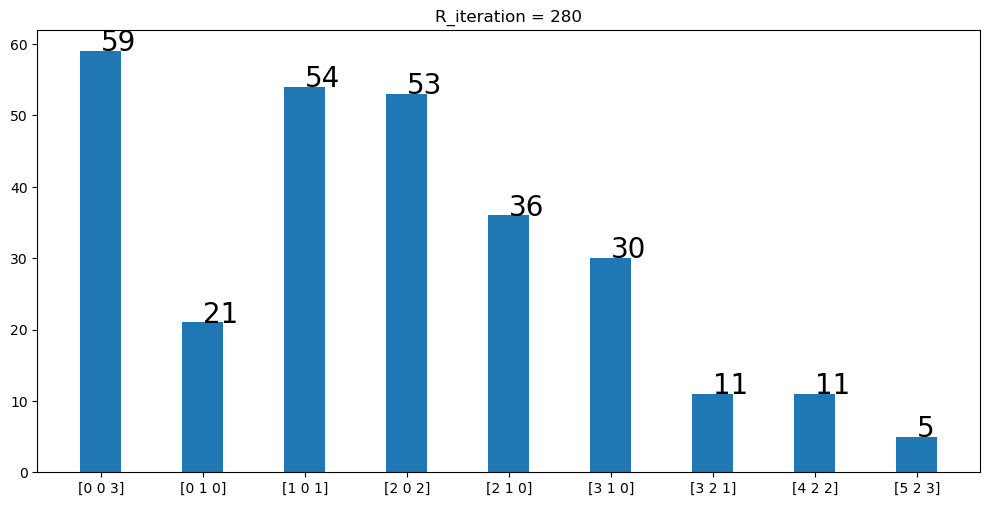

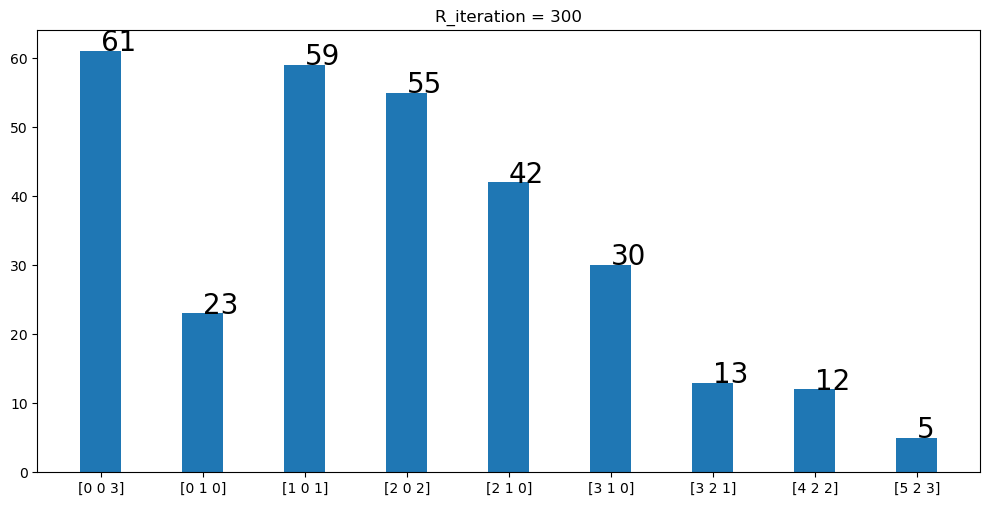

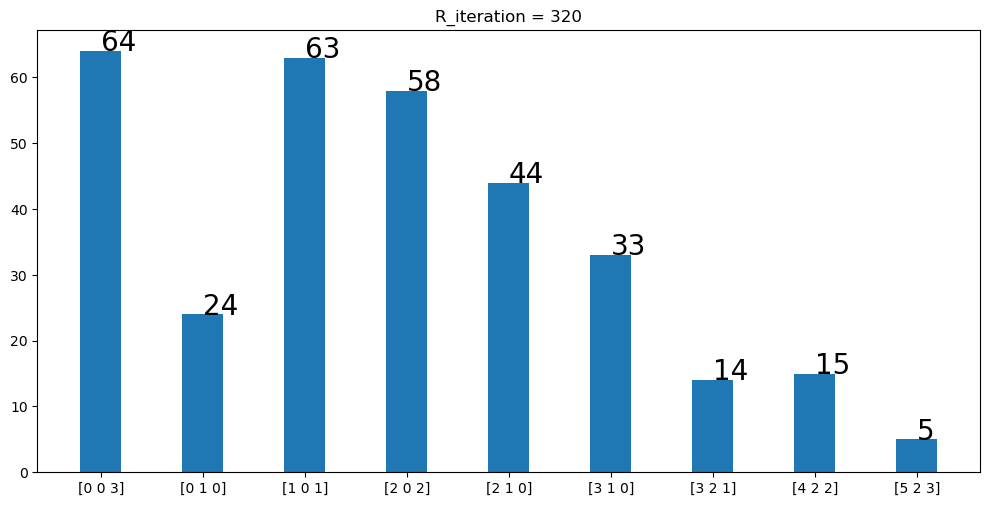

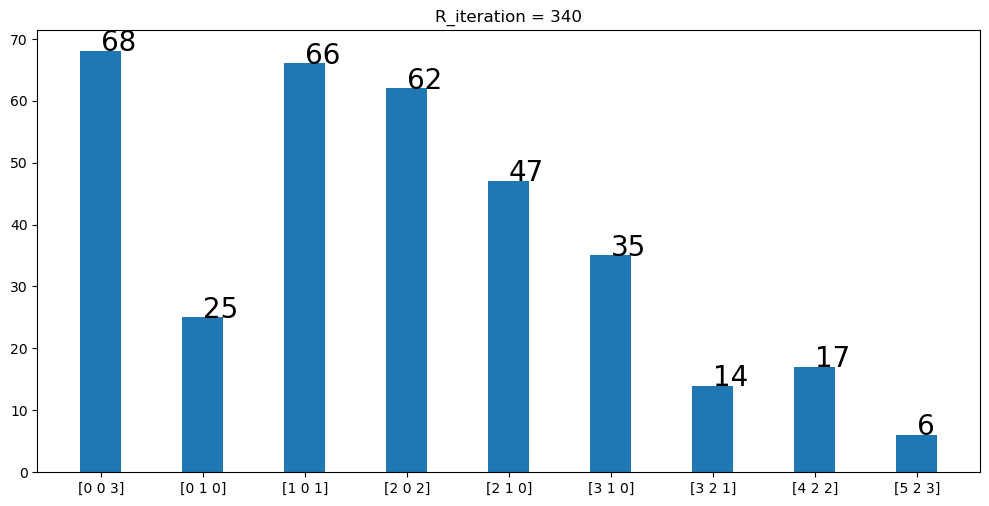

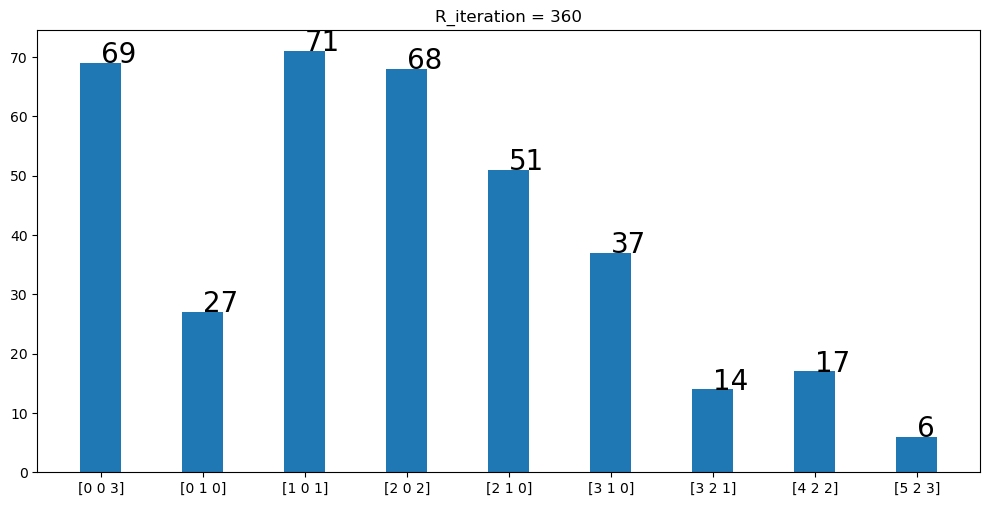

In [119]:
import matplotlib.pyplot as plt


for idx in range(len(r_beta_freq["beta"])):
    beta, cnt = r_beta_freq["beta"][idx], r_beta_freq["cnt"][idx]
    beta = [str(entry) for entry in beta]

    N = len(cnt)
    ind = np.arange(N)
    fig, ax = plt.subplots(figsize = (10,5))
    ax.bar(beta, cnt, width=0.4)

    for index,data in enumerate(cnt):
        plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=20))
    plt.tight_layout()
    
    plt.title(f"R_iteration = {(idx+1)*20}")
    
    plt.savefig(f"r_imgs/riter={idx}.png")


In [116]:
r_beta_freq

{'beta': [array([[0, 0, 3],
         [1, 0, 1],
         [2, 0, 2],
         [2, 1, 0],
         [3, 2, 1]]),
  array([[0, 0, 3],
         [1, 0, 1],
         [2, 0, 2],
         [2, 1, 0],
         [3, 1, 0],
         [3, 2, 1],
         [4, 2, 2]]),
  array([[0, 0, 3],
         [0, 1, 0],
         [1, 0, 1],
         [2, 0, 2],
         [2, 1, 0],
         [3, 1, 0],
         [3, 2, 1],
         [4, 2, 2]]),
  array([[0, 0, 3],
         [0, 1, 0],
         [1, 0, 1],
         [2, 0, 2],
         [2, 1, 0],
         [3, 1, 0],
         [3, 2, 1],
         [4, 2, 2]]),
  array([[0, 0, 3],
         [0, 1, 0],
         [1, 0, 1],
         [2, 0, 2],
         [2, 1, 0],
         [3, 1, 0],
         [3, 2, 1],
         [4, 2, 2]]),
  array([[0, 0, 3],
         [0, 1, 0],
         [1, 0, 1],
         [2, 0, 2],
         [2, 1, 0],
         [3, 1, 0],
         [3, 2, 1],
         [4, 2, 2]]),
  array([[0, 0, 3],
         [0, 1, 0],
         [1, 0, 1],
         [2, 0, 2],
         [2, 1, 0],
